In [54]:
import pandas as pd
import numpy as np
import datetime
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import seaborn as sns

In [55]:
url = "https://raw.githubusercontent.com/jesuspetit1991/lab-cleaning-numerical-data/master/files_for_lab/we_fn_use_c_marketing_customer_value_analysis.csv"

In [56]:
customer_df = pd.read_csv(url)
customer_df.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [57]:
## Customer ID

customer_df = customer_df.drop(columns=["Customer"], axis=1)


In [58]:
customer_df.columns = customer_df.columns.str.lower().str.replace(" ","_")

In [59]:
customer_df.rename(columns = {"employmentstatus" : "employment_status","number_of_open_complaints" : "number_of_open_complaint" }, inplace = True)

In [60]:
customer_df.effective_to_date =  pd.to_datetime(
customer_df.effective_to_date)

In [61]:
customer_df.head()

,state,customer_lifetime_value,response,coverage,education,effective_to_date,employment_status,gender,income,location_code,...,months_since_policy_inception,number_of_open_complaint,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,Washington,2763.519279,No,Basic,Bachelor,2011-02-24,Employed,F,56274,Suburban,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,Arizona,6979.535903,No,Extended,Bachelor,2011-01-31,Unemployed,F,0,Suburban,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,Nevada,12887.431650,No,Premium,Bachelor,2011-02-19,Employed,F,48767,Suburban,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,California,7645.861827,No,Basic,Bachelor,2011-01-20,Unemployed,M,0,Suburban,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,Washington,2813.692575,No,Basic,Bachelor,2011-02-03,Employed,M,43836,Rural,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


## Categoricals and Numericals

In [62]:
customer_df_numerical = customer_df.select_dtypes(np.number)
customer_df_numerical.head()

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaint,number_of_policies,total_claim_amount
0,2763.519279,56274,69,32,5,0,1,384.811147
1,6979.535903,0,94,13,42,0,8,1131.464935
2,12887.431650,48767,108,18,38,0,2,566.472247
3,7645.861827,0,106,18,65,0,7,529.881344
4,2813.692575,43836,73,12,44,0,1,138.130879


In [63]:
customer_df_categorical = customer_df.select_dtypes(object)
customer_df_categorical.head()

,state,response,coverage,education,employment_status,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize


## PLOT Categorical

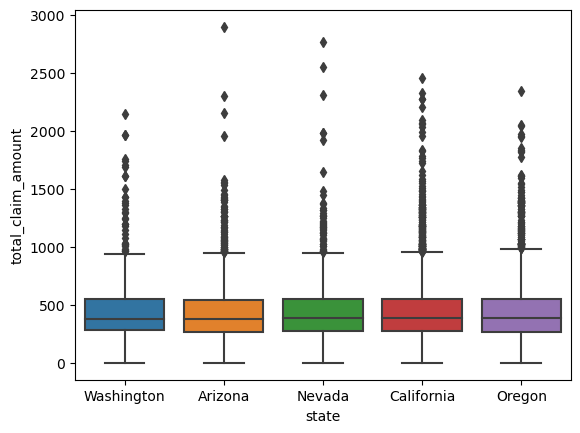

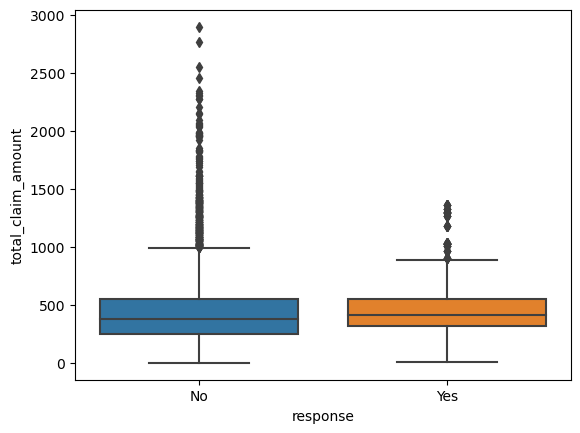

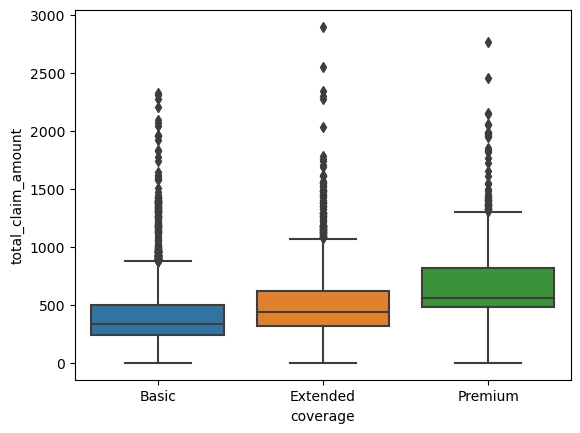

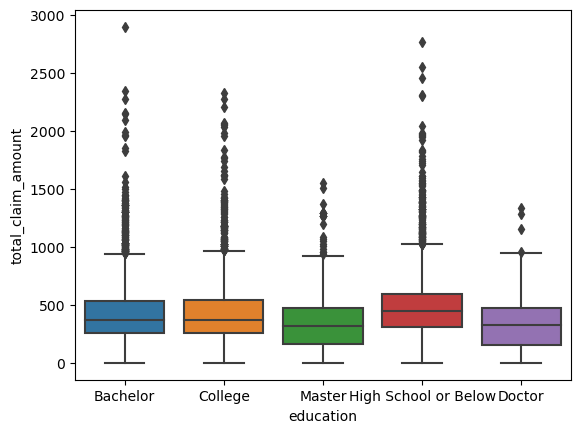

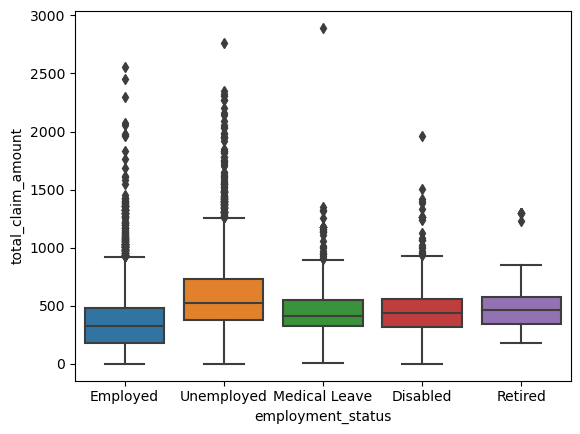

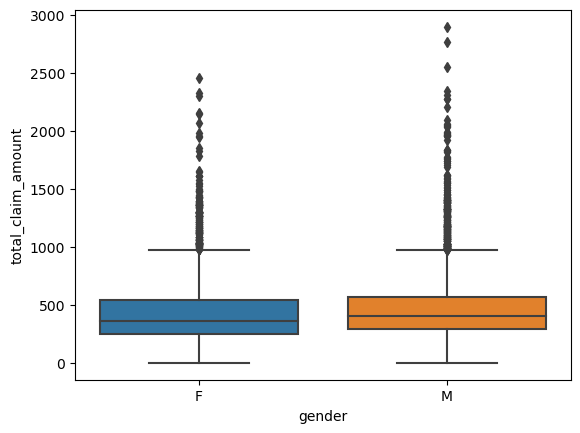

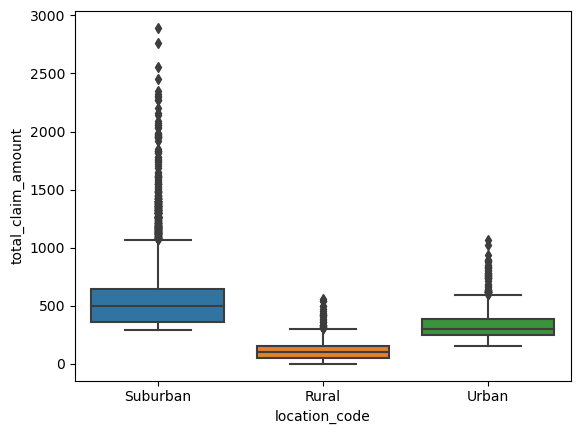

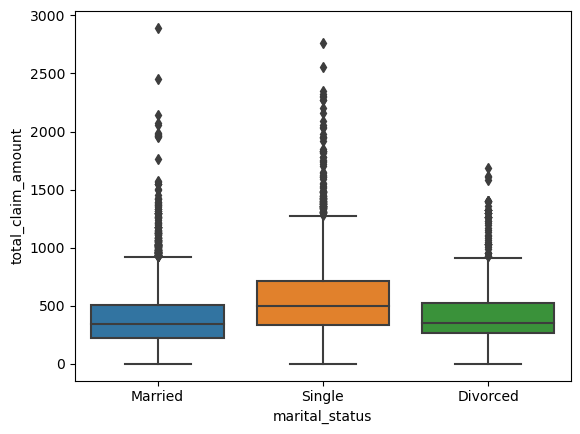

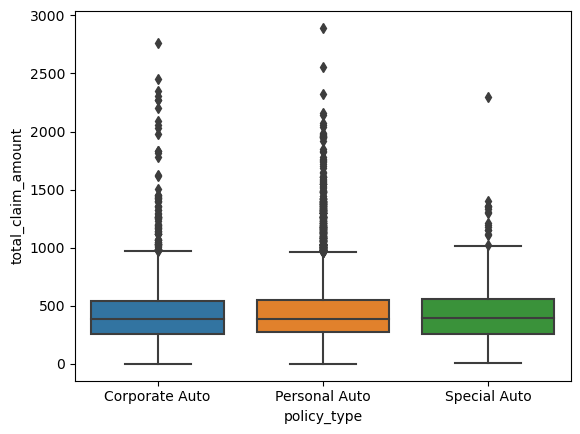

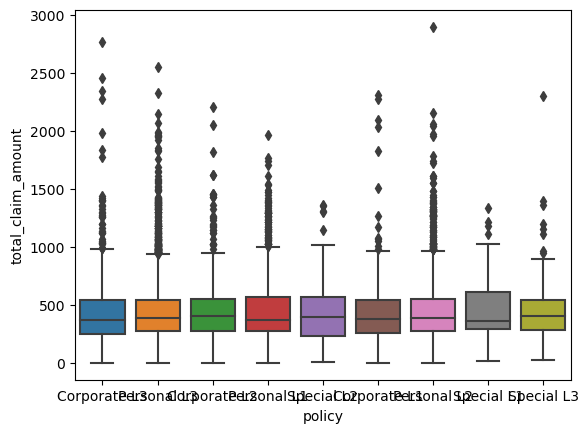

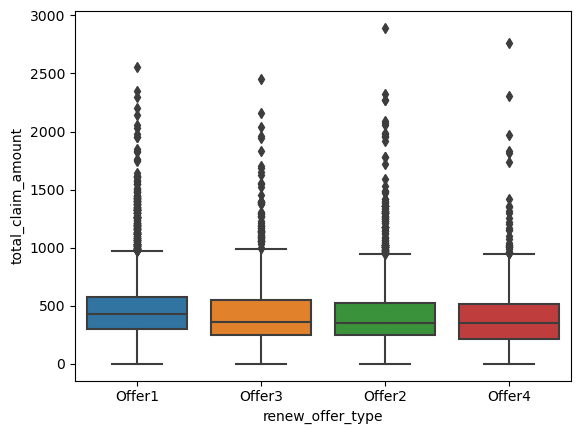

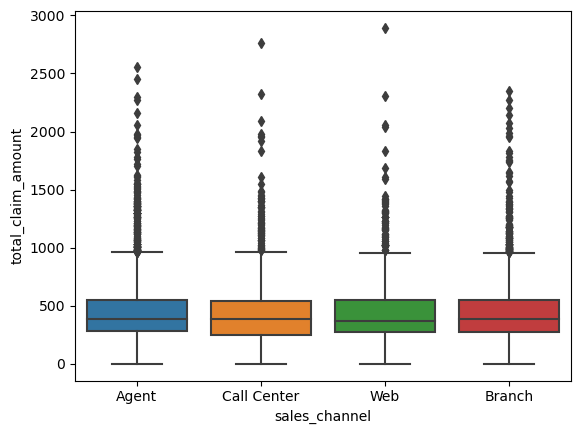

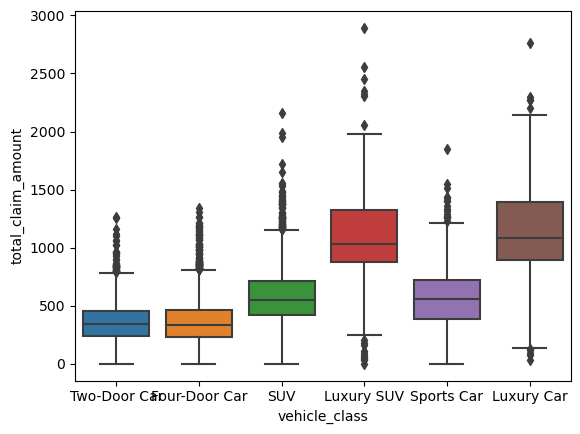

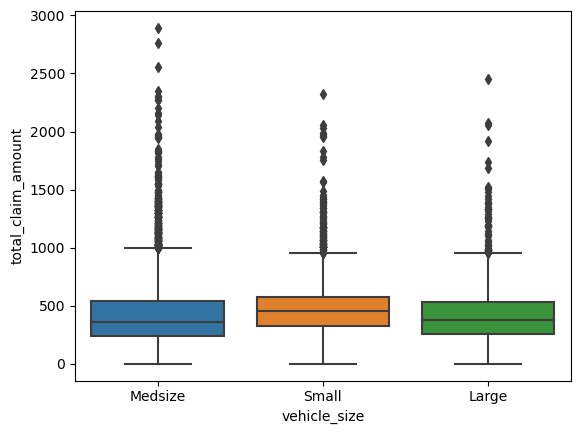

In [64]:
for cat in customer_df_categorical:
    sns.boxplot( x=customer_df[cat], y=customer_df["total_claim_amount"])
    plt.show()

In [65]:
customer_df_categorical.describe().value_counts()

state       response  coverage  education  employment_status  gender  location_code  marital_status  policy_type    policy       renew_offer_type  sales_channel  vehicle_class  vehicle_size
5           2         3         5          5                  2       3              3               3              9            4                 4              6              3               1
3150        7826      5568      2748       5698               4658    5779           5298            6788           3426         3752              3477           4621           6424            1
9134        9134      9134      9134       9134               9134    9134           9134            9134           9134         9134              9134           9134           9134            1
California  No        Basic     Bachelor   Employed           F       Suburban       Married         Personal Auto  Personal L3  Offer1            Agent          Four-Door Car  Medsize         1
dtype: int64

In [66]:
customer_df_categorical.head()

,state,response,coverage,education,employment_status,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize


In [67]:
customer_df.effective_to_date =  pd.to_datetime(
customer_df.effective_to_date)

In [68]:
customer_df_categorical

,state,response,coverage,education,employment_status,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,California,No,Basic,Bachelor,Employed,M,Urban,Married,Personal Auto,Personal L1,Offer2,Web,Four-Door Car,Medsize
9130,California,Yes,Extended,College,Employed,F,Suburban,Divorced,Corporate Auto,Corporate L3,Offer1,Branch,Four-Door Car,Medsize
9131,California,No,Extended,Bachelor,Unemployed,M,Suburban,Single,Corporate Auto,Corporate L2,Offer1,Branch,Four-Door Car,Medsize
9132,California,No,Extended,College,Employed,M,Suburban,Married,Personal Auto,Personal L2,Offer3,Branch,Four-Door Car,Large


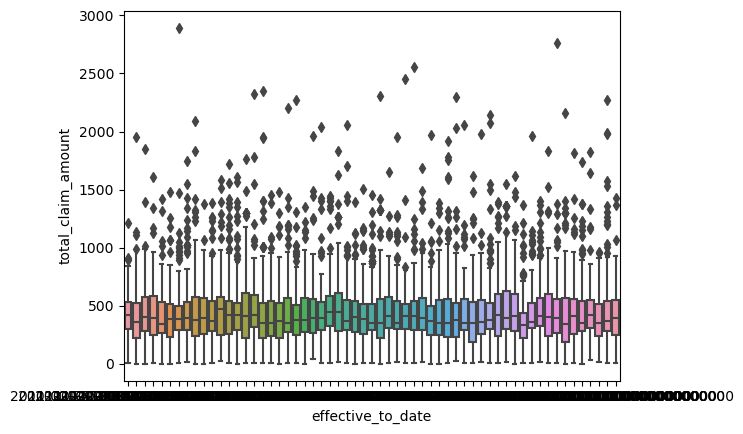

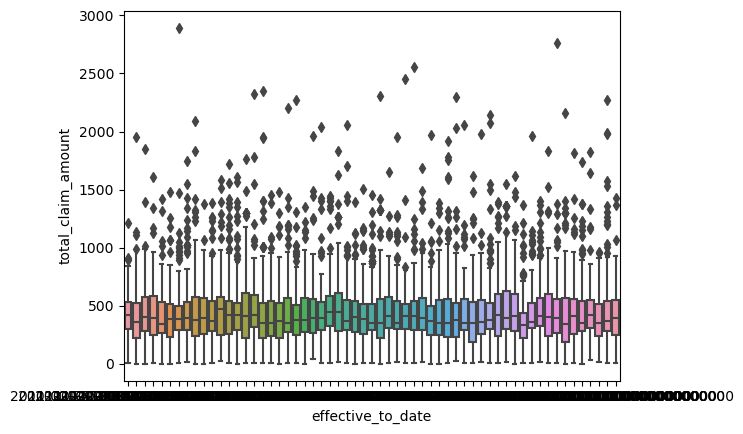

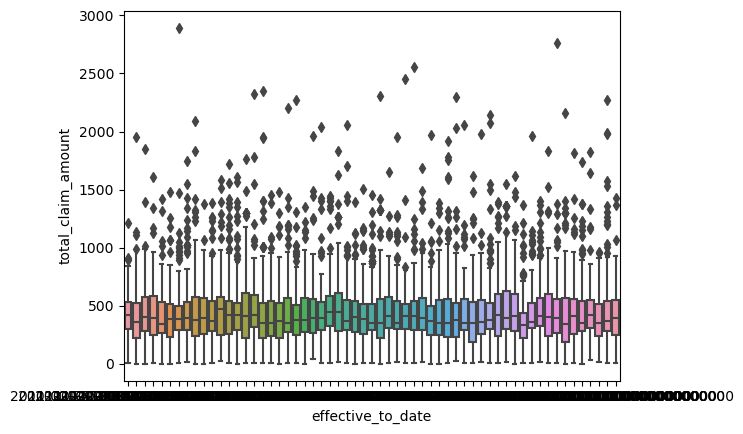

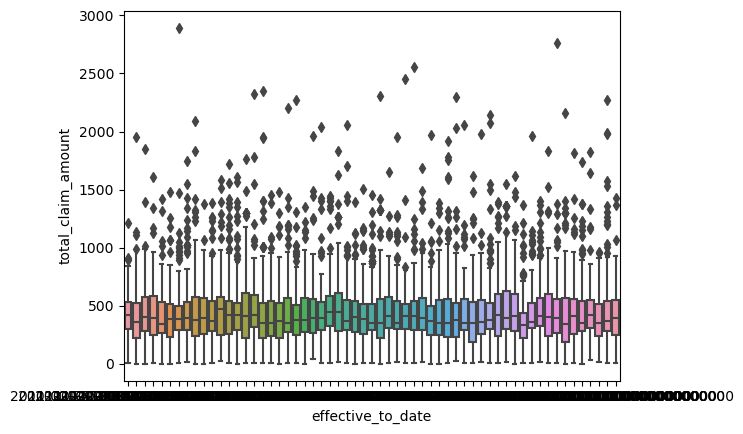

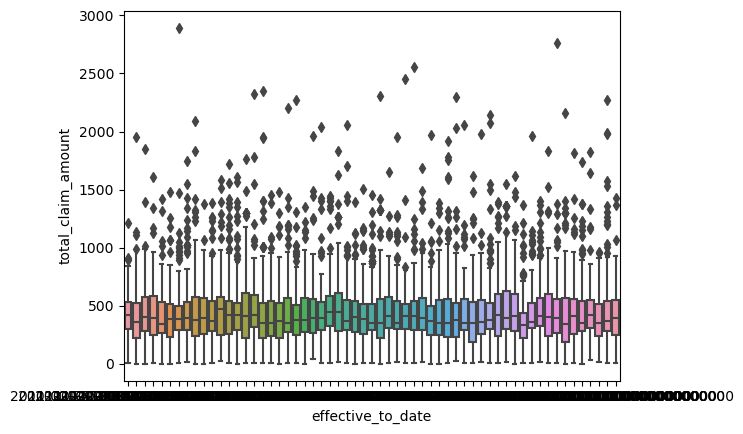

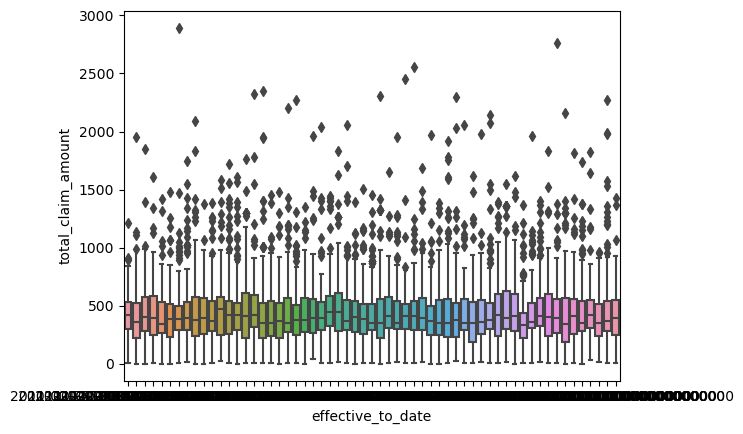

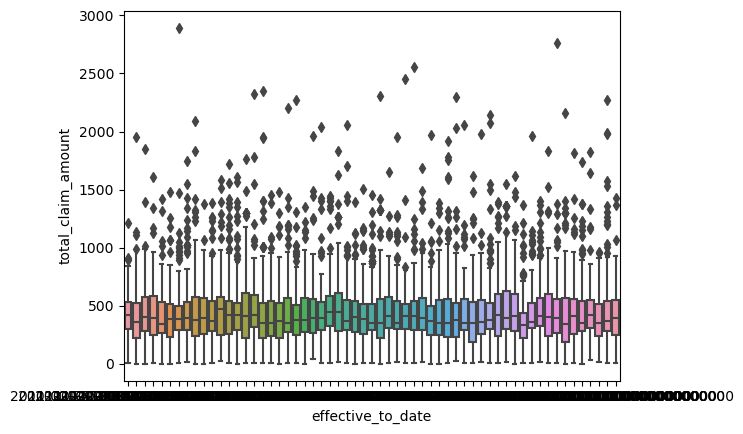

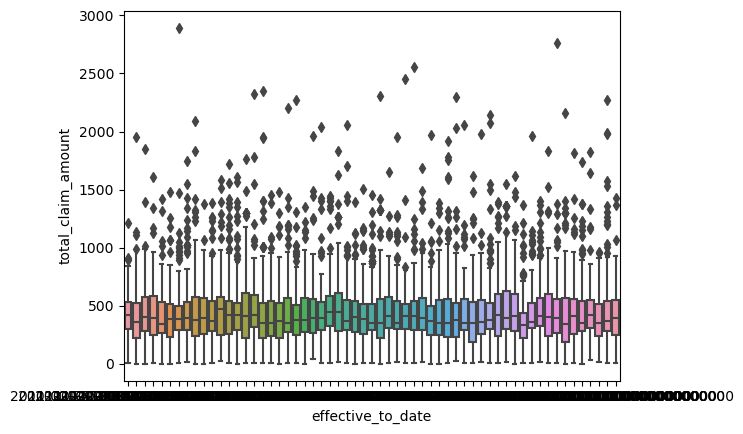

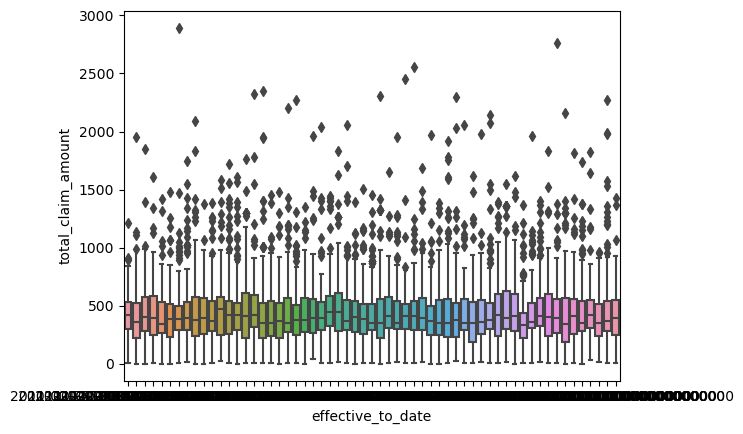

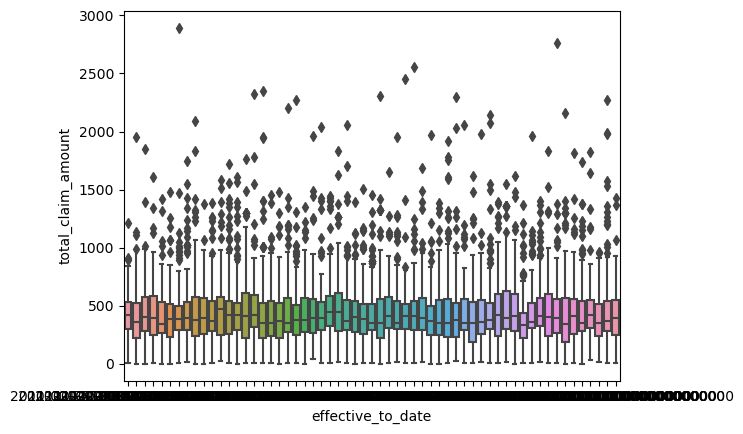

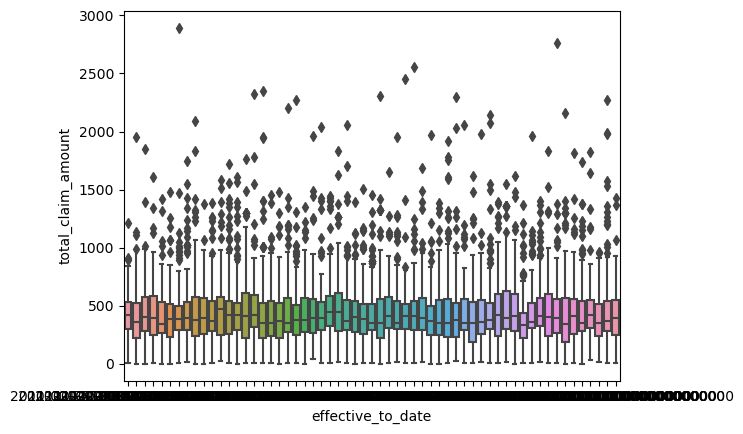

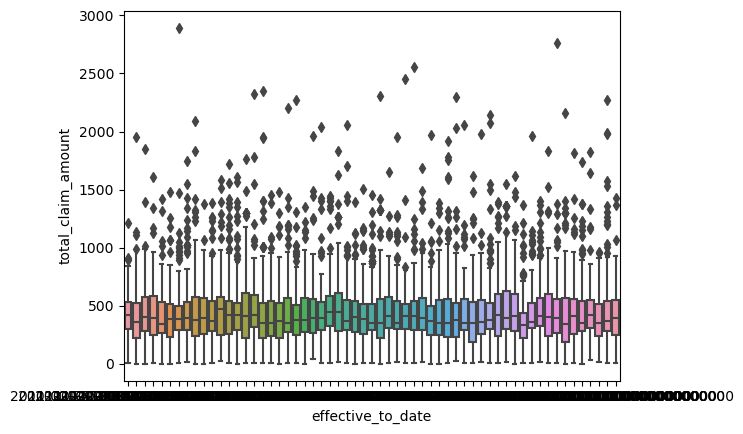

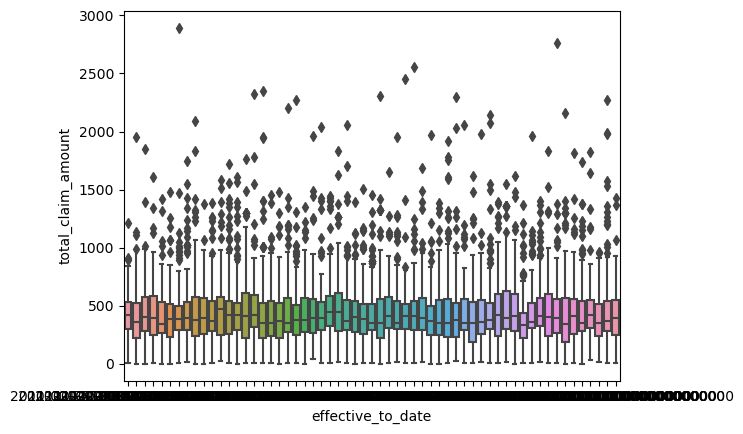

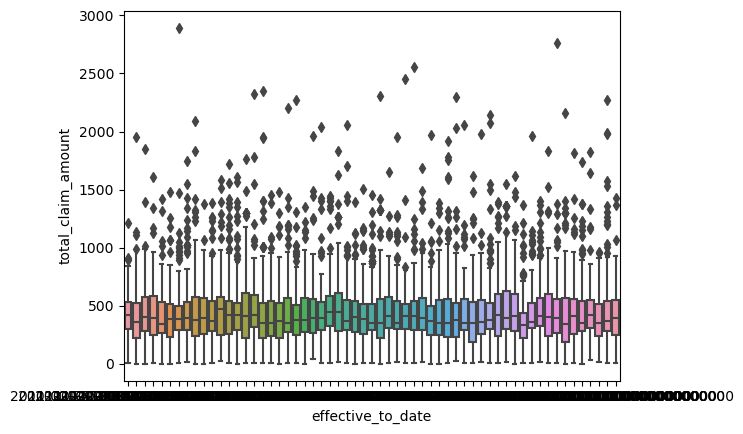

In [69]:
for cat in customer_df_categorical:
    sns.boxplot( x=customer_df["effective_to_date"], y=customer_df["total_claim_amount"])
    plt.show()

## Outliers

customer_lifetime_value


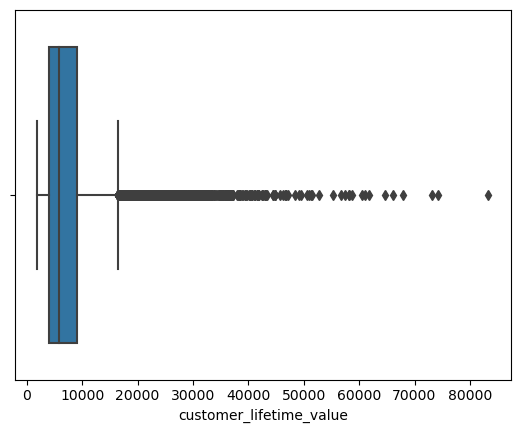

income


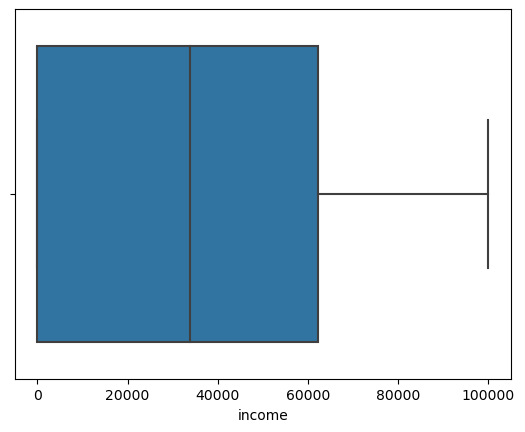

monthly_premium_auto


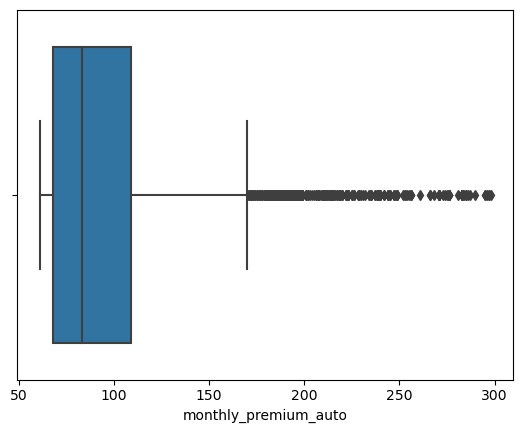

months_since_last_claim


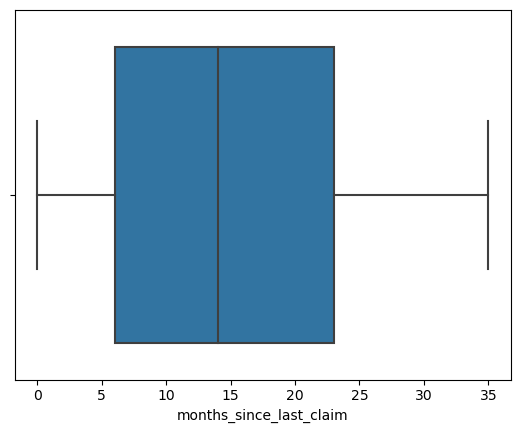

months_since_policy_inception


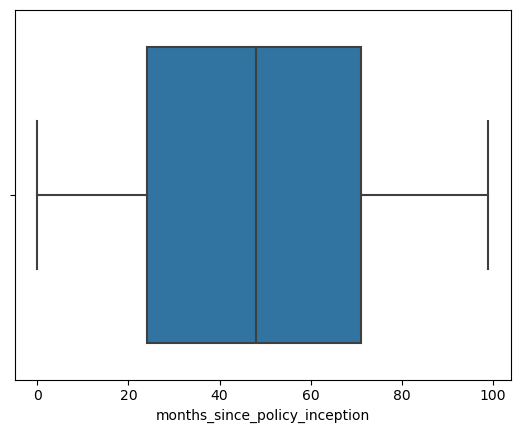

number_of_open_complaint


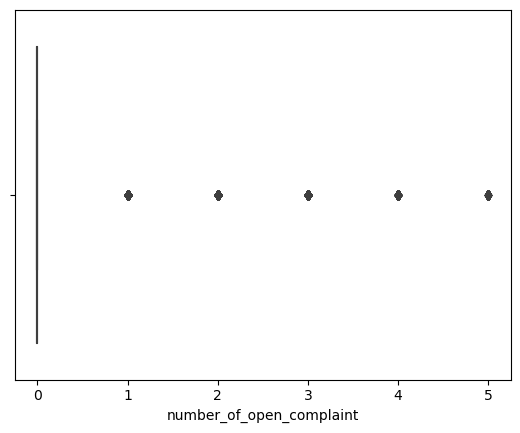

number_of_policies


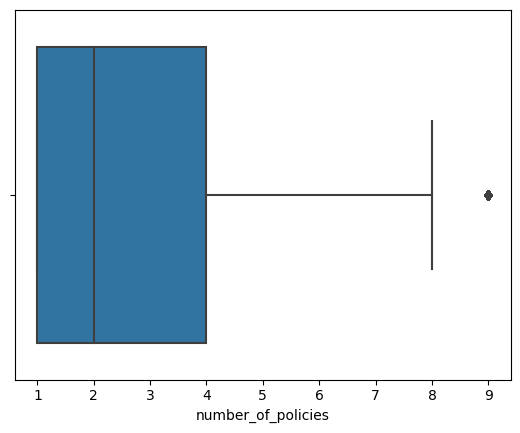

total_claim_amount


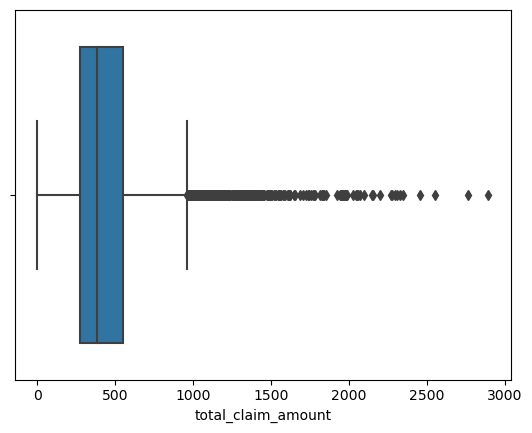

In [70]:
for item in customer_df_numerical:
    print(item)
    sns.boxplot(x = customer_df_numerical[item])
    plt.show()

In [71]:
cols = ['customer_lifetime_value', 'monthly_premium_auto', 'total_claim_amount']


(9134, 8)


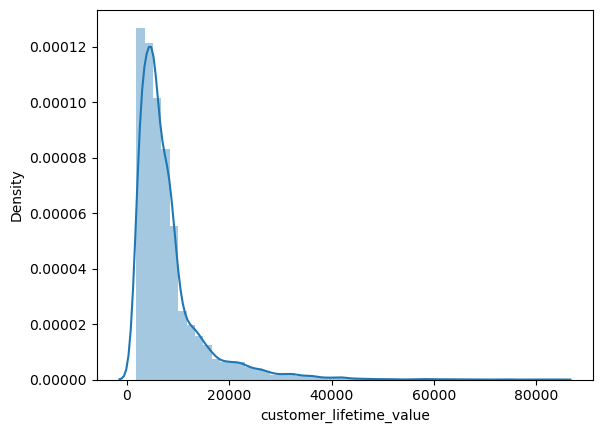

(9134, 8)


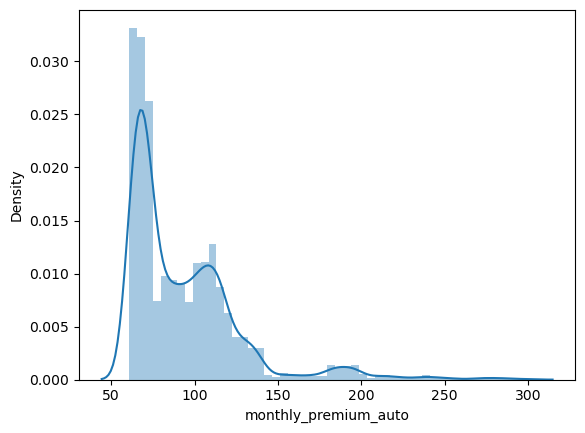

(9134, 8)


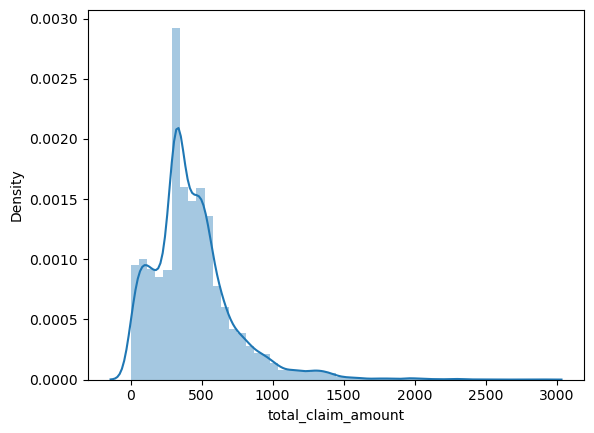

In [72]:
for col in customer_df_numerical[cols]:
    print(customer_df_numerical.shape)
    sns.distplot(customer_df_numerical[col])
    plt.show(cols) 

In [73]:
def clean_outliers (data, columns):

    Q1 = data[columns].quantile(0.25)  
    Q3 = data[columns].quantile(0.75) 
    IQR = Q3 - Q1          

    data = data[~(  
        (data[columns] < (Q1 - 1.5 * IQR))
        | (data[columns] > (Q3 + 1.5 * IQR)
          )).any(axis=1)]
    
    return data

In [74]:
customer_df_numerical = clean_outliers(customer_df_numerical, cols)

In [75]:
customer_df_numerical.head()


,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaint,number_of_policies,total_claim_amount
0,2763.519279,56274,69,32,5,0,1,384.811147
2,12887.431650,48767,108,18,38,0,2,566.472247
3,7645.861827,0,106,18,65,0,7,529.881344
4,2813.692575,43836,73,12,44,0,1,138.130879
5,8256.297800,62902,69,14,94,0,2,159.383042


(7847, 8)


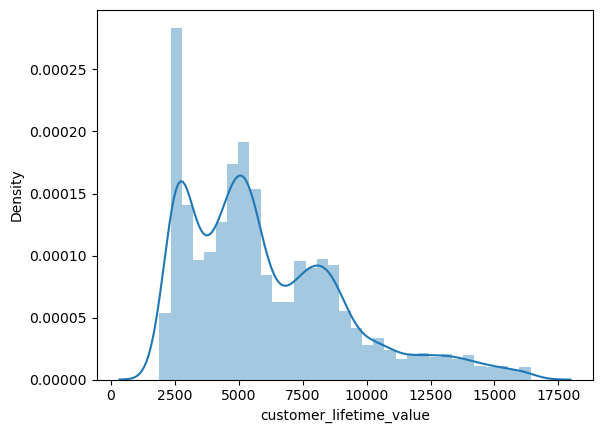

(7847, 8)


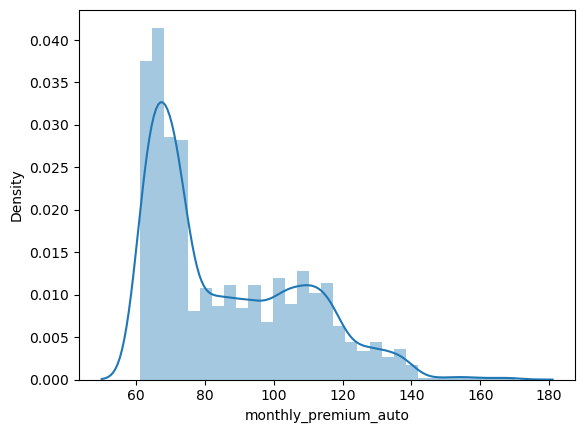

(7847, 8)


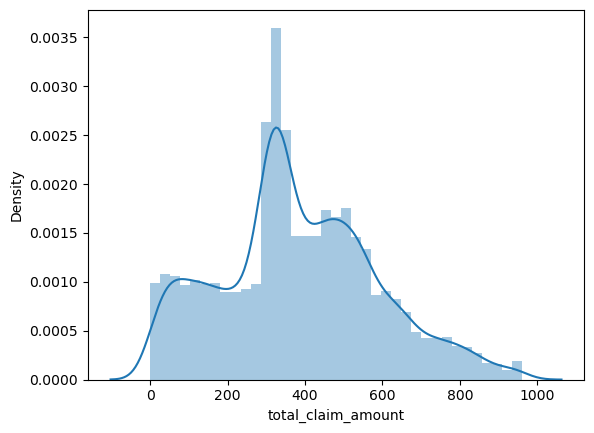

In [76]:
for col in customer_df_numerical[cols]:
    print(customer_df_numerical.shape)
    sns.distplot(customer_df_numerical[col])
    plt.show(cols) 

## Copy

In [77]:
customer_df_numerical_2 = customer_df_numerical
customer_df_categorical_2 = customer_df_categorical

## Normalization

In [78]:
from sklearn.preprocessing import StandardScaler
preprocessor = StandardScaler()
customer_df_numerical = preprocessor.fit_transform(customer_df_numerical)

In [79]:
customer_df_numerical

array([[-1.06698424,  0.58873276, -0.77976444, ..., -0.42311556,
        -0.82829183,  0.00891854],
       [ 2.17772567,  0.34146528,  0.9917502 , ..., -0.42311556,
        -0.422852  ,  0.89651634],
       [ 0.49780462, -1.26483459,  0.90090329, ..., -0.42311556,
         1.60434718,  0.71773285],
       ...,
       [ 0.66383258, -1.26483459, -0.0529892 , ...,  2.808735  ,
        -0.422852  ,  1.99251042],
       [ 0.45888975, -0.54213634,  0.44666877, ..., -0.42311556,
        -0.01741216,  1.50593728],
       [-1.1155984 , -1.26483459, -0.41637682, ..., -0.42311556,
        -0.82829183, -0.06540327]])

## Encoding

In [80]:
customer_df_categorical.head()

,state,response,coverage,education,employment_status,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize


In [81]:
customer_df_categorical.columns

Index(['state', 'response', 'coverage', 'education', 'employment_status',
       'gender', 'location_code', 'marital_status', 'policy_type', 'policy',
       'renew_offer_type', 'sales_channel', 'vehicle_class', 'vehicle_size'],
      dtype='object')

In [82]:

column1 = ['state', 'marital_status', 'policy_type', 'policy', 'renew_offer_type', 'sales_channel', 'vehicle_class']

column2 = ['coverage', 'employment_status', 'location_code', 'vehicle_size']

In [83]:
column1 = customer_df_categorical[column1]
column2 = customer_df_categorical[column2]

In [84]:
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder

preprocessor1 = OneHotEncoder()
preprocessor2 = OrdinalEncoder()
column1 = preprocessor1.fit_transform(column1)
column2 = preprocessor2.fit_transform(column2)

## CHECKING

In [85]:
customer_df_numerical

array([[-1.06698424,  0.58873276, -0.77976444, ..., -0.42311556,
        -0.82829183,  0.00891854],
       [ 2.17772567,  0.34146528,  0.9917502 , ..., -0.42311556,
        -0.422852  ,  0.89651634],
       [ 0.49780462, -1.26483459,  0.90090329, ..., -0.42311556,
         1.60434718,  0.71773285],
       ...,
       [ 0.66383258, -1.26483459, -0.0529892 , ...,  2.808735  ,
        -0.422852  ,  1.99251042],
       [ 0.45888975, -0.54213634,  0.44666877, ..., -0.42311556,
        -0.01741216,  1.50593728],
       [-1.1155984 , -1.26483459, -0.41637682, ..., -0.42311556,
        -0.82829183, -0.06540327]])

In [86]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder

def apply_model(df: pd.DataFrame, target, model_list):
    X_train, X_test, y_train, y_test = split_data(df, target)
    
    X_train_scaled, X_test_scaled = scale_data(sets=[X_train, X_test], scaler=StandardScaler)

    X_train_scaled_and_encoded, X_test_scaled_and_encoded = encode_data(
        scaled_sets=[X_train_scaled, X_test_scaled],
        encoder=OneHotEncoder)
    
    trained_models = []
    for model in model_list:
        trained_models.append(model().fit(X_train_scaled_and_encoded, y_train))
    
    predictions_trained_models = []
    for trained_model in trained_models:
        predictions_trained_models.append(trained_model.predict(X_test_scaled_and_encoded))
    
    return predictions_trained_models, y_test

In [87]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression      

df["response"] = df["response"].map({'Yes': 1, 'No': 0})

lst_y_predictions, y_test = apply_model(
    df,
    target="response",
    model_list=[LogisticRegression, KNeighborsClassifier])

NameError: name 'df' is not defined

In [ ]:
from sklearn.metrics import confusion_matrix

for y_pred in lst_y_predictions:
    display(confusion_matrix(y_test, y_pred))

NameError: name 'lst_y_predictions' is not defined